In [2]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA
from pyspark.ml.feature import VectorAssembler
from functools import reduce
# from tqdm import tqdm

sc= SparkContext()
sqlContext = SQLContext(sc)

In [3]:
df = sqlContext.read.options(inferSchema='true', header='true').load('dataset')

In [4]:
df.select('pca_features').show(5)

+--------------------+
|        pca_features|
+--------------------+
|[7.46652731979111...|
|[-4.4924025163180...|
|[2.61741671706775...|
|[5.55800451104079...|
|[4.98150290491624...|
+--------------------+
only showing top 5 rows



In [5]:
df.show()

+--------------------+--------+
|        pca_features|CITEsort|
+--------------------+--------+
|[7.46652731979111...|     ACT|
|[-4.4924025163180...|  C-mono|
|[2.61741671706775...|  CD4+ T|
|[5.55800451104079...|  CD4+ T|
|[4.98150290491624...|  CD8+ T|
|[4.57613006366093...|  CD4+ T|
|[-7.8628762317470...| NC-mono|
|[6.98638584301929...|  CD8+ T|
|[8.91687773343435...|     ACT|
|[-7.6157478596061...|     ACT|
|[5.29679290463833...|     ACT|
|[2.91381397038213...|  CD8+ T|
|[3.97114115574227...|     ACT|
|[1.03882406794541...|  CD4+ T|
|[0.14270695568292...|  CD4+ T|
|[2.97562961813030...|  B cell|
|[14.3869576747256...|     mNK|
|[11.0719627202645...|     mNK|
|[-0.0577387949146...|  CD4+ T|
|[6.76005656217870...|     ACT|
+--------------------+--------+
only showing top 20 rows



In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import Row
# TODO plot with two columns stored in pca_features

res_df = df.select('pca_features', 'CITEsort').rdd.map(lambda x: Row(PC1=float(x[0][0]), PC2=float(x[0][1]), Type=x[1])).toDF()
res_df.show()
# res_df.toPandas().plot.scatter('PC1', 'PC2', 0.5)

+--------------------+-------------------+-------+
|                 PC1|                PC2|   Type|
+--------------------+-------------------+-------+
|   7.466527319791115| -3.621109280639099|    ACT|
|   -4.49240251631806|  -3.60904071171579| C-mono|
|   2.617416717067752|-2.8396660731038987| CD4+ T|
|   5.558004511040797| -3.021348833307495| CD4+ T|
|   4.981502904916248| -2.916851869447794| CD8+ T|
|    4.57613006366093| -1.984890892516932| CD4+ T|
|  -7.862876231747052| 0.7167291308726885|NC-mono|
|   6.986385843019296|  8.271883136925556| CD8+ T|
|    8.91687773343435| -4.816421479762349|    ACT|
|  -7.615747859606101|-1.2162290732751164|    ACT|
|    5.29679290463833|  4.412079252175992|    ACT|
|  2.9138139703821335| -2.693648286811504| CD8+ T|
|   3.971141155742275|  5.019387360245581|    ACT|
|  1.0388240679454115|-2.6729016364087332| CD4+ T|
| 0.14270695568292882|-2.5235116686240433| CD4+ T|
|  2.9756296181303012| -6.504211491359225| B cell|
|  14.386957674725698|  6.20962

In [7]:
df = res_df.toPandas()
df

,PC1,PC2,Type
0,7.466527,-3.621109,ACT
1,-4.492403,-3.609041,C-mono
2,2.617417,-2.839666,CD4+ T
3,5.558005,-3.021349,CD4+ T
4,4.981503,-2.916852,CD8+ T
...,...,...,...
15406,3.290933,-3.193038,CD8+ T
15407,3.181337,-3.669521,CD4+ T
15408,3.560592,-4.051735,CD4+ T
15409,-17.352958,0.867313,C-mono


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

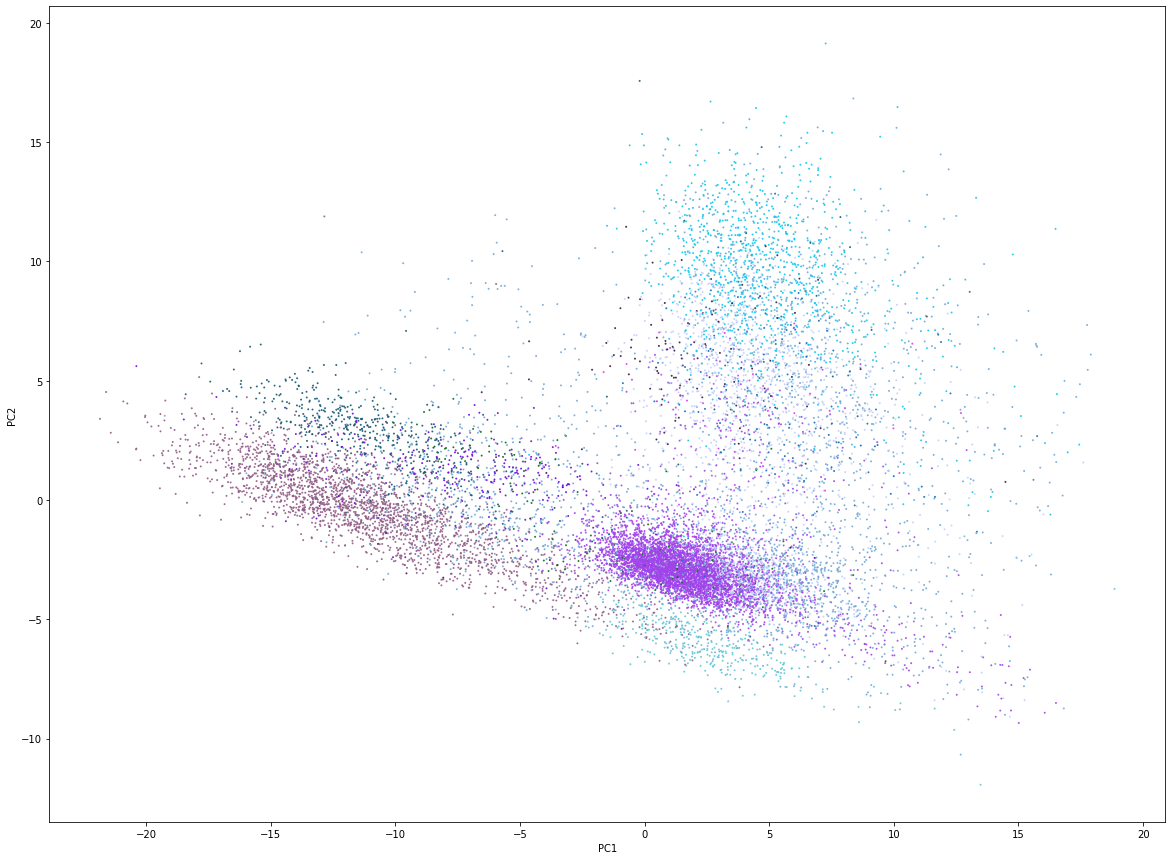

In [22]:
import numpy as np
types = df['Type'].unique()
colormaps = {}
for i in types:
    colormaps[i] = (np.random.rand(), np.random.rand(), np.random.rand(), 0.8)

color = []
for i in df['Type']:
    color.append(colormaps[i])

df.plot.scatter('PC1', 'PC2', 1, color, figsize=(20,15))

In [24]:
# TODO plot with two random columns in raw data
# df = sqlContext.read.format('csv').options(inferSchema='true', header='true').load('file:///home/pgroup1/l7/PBMC_16k_RNA.csv')
df = sqlContext.read.format('csv').options(inferSchema='true', header='true').load('../../../Dataset/PBMC/PBMC_16k_RNA.csv')

In [25]:
import numpy as np
column = df.columns
col1 = np.random.randint(len(column) - 1) + 1
col2 = np.random.randint(len(column) - 1) + 1
sel_df = df.select('index', column[col1], column[col2])
sel_df

DataFrame[index: string, NEMP1: double, NRAS: double]

In [27]:
# label = sqlContext.read.format('csv').options(inferSchema='true', header='true').load('file:///home/pgroup1/l7/PBMC_16k_RNA_label.csv')
label = sqlContext.read.format('csv').options(inferSchema='true', header='true').load('../../../Dataset/PBMC//PBMC_16k_RNA_label.csv')
label.printSchema()

root
 |-- index: string (nullable = true)
 |-- CITEsort: string (nullable = true)



In [28]:
sel_df = sel_df.join(label, on=['index']).drop('index')

In [29]:
plot_df = sel_df.toPandas()
plot_df

,NEMP1,NRAS,CITEsort
0,-0.110966,-0.229672,ACT
1,-0.172137,-0.300866,C-mono
2,-0.069561,-0.174984,CD4+ T
3,-0.101567,-0.219647,CD4+ T
4,-0.082979,-0.202025,CD8+ T
...,...,...,...
15406,-0.074036,-0.182557,CD8+ T
15407,-0.072370,-0.180785,CD4+ T
15408,-0.076794,-0.178739,CD4+ T
15409,-0.069261,-0.170181,C-mono


<AxesSubplot:xlabel='NEMP1', ylabel='NRAS'>

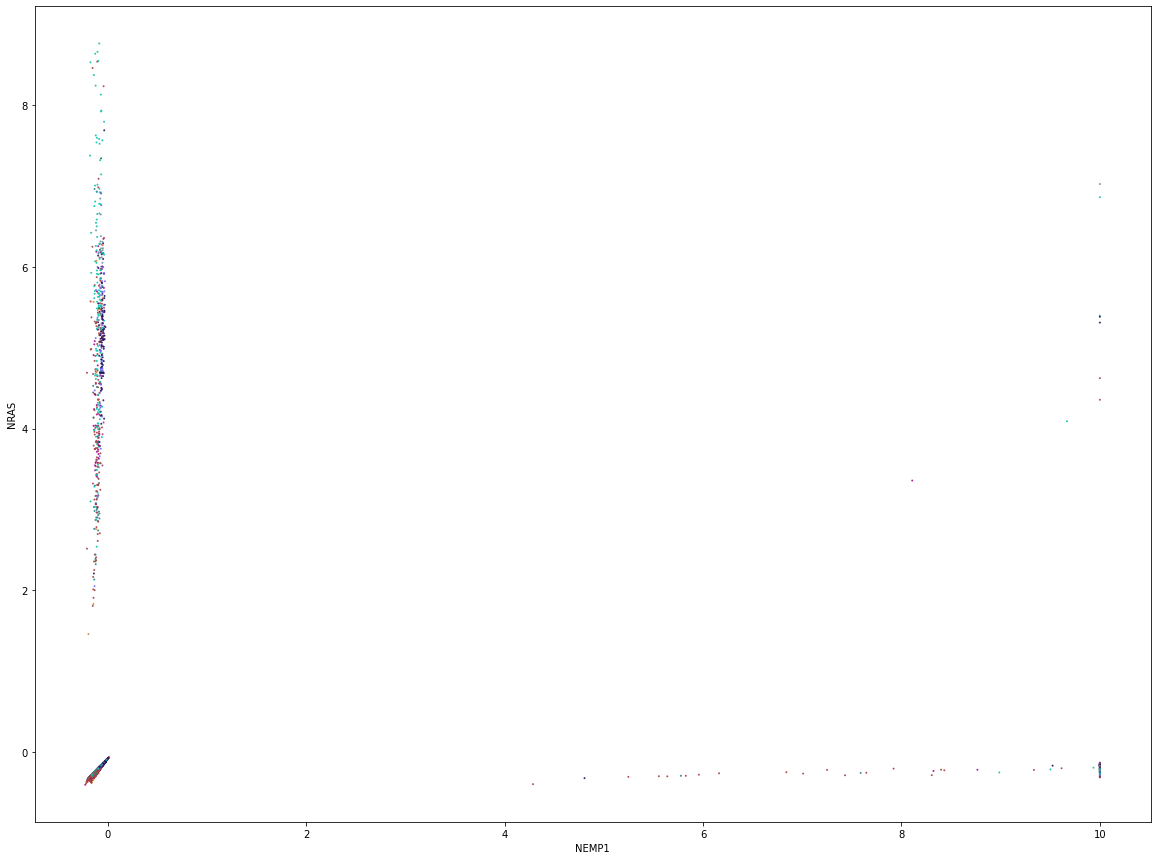

In [31]:
types = plot_df['CITEsort'].unique()
colormaps = {}
for i in types:
    colormaps[i] = (np.random.rand(), np.random.rand(), np.random.rand(), 0.8)

color = []
for i in plot_df['CITEsort']:
    color.append(colormaps[i])

plot_df.plot.scatter(column[col1], column[col2], 1, color, figsize=(20,15))